## Import Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Multivariate LR

In [ ]:
df = pd.read_csv('MultipleLR.csv', header=None)
x = df.to_numpy()
y = x[:, [-1]]

x = np.block([np.ones((x.shape[0],1)), x[:,0:-1]])
print(y.shape)
print(x.shape)

(25, 1)
(25, 4)


### Main Functions 

In [ ]:
def initialization(x):
    costs, thetas = [], []
    n = x.shape[1]
    theta = np.zeros((n, 1))
    return n, theta, costs, thetas
    
def h(x, theta) : 
    y_pred = x @ theta
    return y_pred

def cost(n, e):
    loss = (1/(2* n))*(e.T @ e)[0][0] #why [0][0] 
    return loss

def calc_gradient(n, x, e):
    D_theta = x.T @ e * (1/n)
    return D_theta 
    
def thetaVSloss(thetas_ls, costs):
    thetas_ls = np.squeeze(thetas_ls)
    n, m = thetas_ls.shape
    fig, a =  plt.subplots(1, m, figsize=(20, 5))
    for i, th in enumerate(thetas_ls.T):
        a[i].plot(th, costs)
        a[i].scatter(th, costs, marker='o', color='orange')
        a[i].set(xlabel=f"theta{i+1}", ylabel='cost')
    print(n, m)

# MINI-BATCH

In [ ]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    # np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)* batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [ ]:
def mini_batches_GD(x, y, alpha, batch_size, max_iterations):
    n, theta, costs, thetas = initialization(x)
    mini_batches = create_mini_batches(x, y, batch_size)

    for i in range(max_iterations):
        for mini_batch in mini_batches:
            x_mini, y_mini = mini_batch
            #1. calc h(x)
            y_pred = h(x_mini, theta)   

            #2. j(theta0, theta1)
            e = (y_pred - y_mini)
            loss = cost(batch_size, e)
            #3. calc deta thetas
            D_theta = calc_gradient(batch_size, x_mini, e)

            #4. get the direction and update 
            theta = theta - alpha * D_theta 
        err = h(x, theta) - y 
        epoch_loss = cost(len(err), err)
        # print("epoch_loss", epoch_loss)
        costs.append(epoch_loss)
        thetas.append(theta)
         
    return thetas, costs, thetas[-1]

In [ ]:
thetas, costs, theta = mini_batches_GD(x, y, 0.00001, 25, 100)
r = r2_score(y, h(x, theta))
print(r)

0.9792027316970324


Text(0.5, 1.0, 'Loss vs no. of iterations')

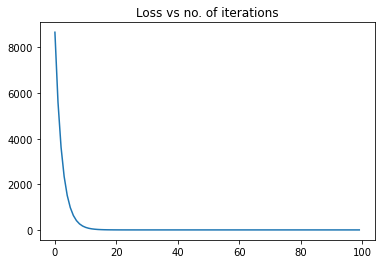

In [ ]:
fig2 = plt.figure(2)
plt.plot(costs)
plt.title("Loss vs no. of iterations")

100 4


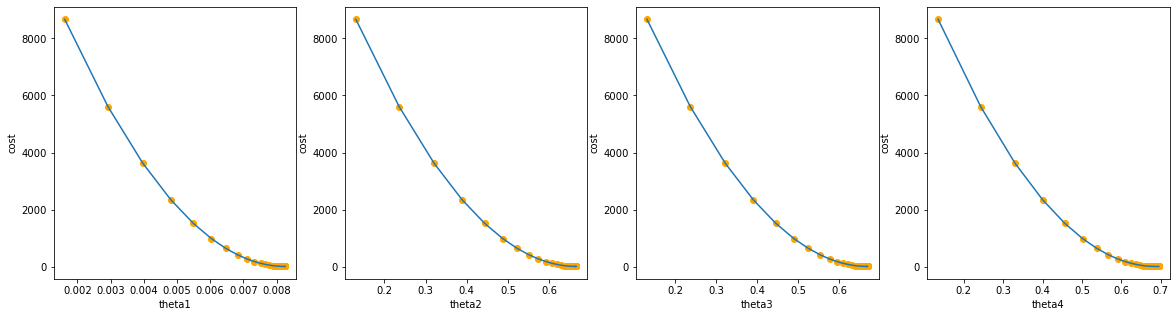

In [ ]:
thetaVSloss(thetas, costs)